In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle

In [3]:
## import the data 
df_num = pd.read_csv("AirQuality.csv", sep=";")
df_num

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
del df_num["Unnamed: 15"]

In [5]:
del df_num["Unnamed: 16"]

In [6]:
del df_num["Time"]

In [7]:
del df_num["Date"]

In [8]:
df_num.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [9]:
df_num.shape

(9471, 13)

In [10]:
df_num = df_num.dropna()

In [11]:
df_num

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1023.4+ KB


In [13]:
def replace(elt):
    goo = list(elt)
    for i, _ in enumerate(goo) :
        goo[i] = float(goo[i].replace(",","."))
    goo = pd.Series(goo)
    return goo

In [14]:
df_num["CO(GT)"]=replace(df_num["CO(GT)"])
df_num["C6H6(GT)"] =replace(df_num["C6H6(GT)"])
df_num["T"] = replace(df_num["T"])
df_num["AH"] =replace(df_num["AH"])
df_num["RH"] =replace(df_num["RH"])

In [15]:
df_num

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [16]:
## Step 1 Standardization

df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.183831,0.194881
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.160400,0.194052
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.283414,0.194686
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.400571,0.195622
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.392761,0.195676


In [17]:
## test of correlation with Bartlett’s Test of Sphericity:

chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [18]:
## For our dataset p_value is 0.0 which is less
#than 0.05. Hence we can reject the Null Hypothesis and agree
#that there is at least one pair of variables in the data which 
#are correlated. Hence, PCA is recommended.

In [19]:
## step 2 Covariance Matrix Computation

cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix n%s', cov_matrix)

Covariance Matrix n%s [[ 1.00010688e+00  4.14158342e-02  1.28364886e-01 -3.13816293e-02
   2.99290193e-02  5.26507194e-01 -8.99904648e-02  6.71198796e-01
  -7.37318448e-02  8.03182299e-02 -6.89462665e-02 -4.82325238e-02
  -4.58971356e-02]
 [ 4.14158342e-02  1.00010688e+00  1.70025463e-01  8.52778515e-01
   9.33201472e-01  2.78022262e-01  8.70287346e-02  1.54045989e-01
   8.45238982e-01  8.92529820e-01  7.54924778e-01  7.45455138e-01
   7.64984673e-01]
 [ 1.28364886e-01  1.70025463e-01  1.00010688e+00  3.73265072e-02
   1.10115296e-01 -4.42772515e-03  4.88261057e-02  1.03318537e-01
   1.62697330e-01  1.01195888e-01 -9.00888489e-06  8.28515423e-03
   1.25014573e-02]
 [-3.13816293e-02  8.52778515e-01  3.73265072e-02  1.00010688e+00
   7.67515088e-01 -1.17410138e-03  5.12247447e-01 -1.09936593e-02
   7.74756227e-01  6.41402887e-01  9.71478837e-01  9.25161240e-01
   9.84660302e-01]
 [ 2.99290193e-02  9.33201472e-01  1.10115296e-01  7.67515088e-01
   1.00010688e+00  3.31307692e-01 -7.3675239

In [20]:
## step 3 Computing Eigenvectors and Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('n Eigen Values n %s', eig_vals)
print('n')
print('Eigen Vectors n %s', eig_vecs)

n Eigen Values n %s [6.58550956e+00 2.94514699e+00 1.40898076e+00 1.03240134e+00
 3.93794211e-01 2.50768473e-01 1.31583463e-01 1.05688899e-01
 7.65118335e-02 3.98107822e-02 2.82213615e-02 2.60827588e-03
 3.63543273e-04]
n
Eigen Vectors n %s [[ 4.10216218e-03 -3.61868679e-01 -5.28426727e-01 -6.08863268e-02
   7.05109140e-01  2.84603905e-01 -7.84072272e-02 -3.03531567e-02
  -2.88180338e-02  1.24659475e-03  3.10992002e-03  1.81271583e-03
  -2.08288436e-05]
 [-3.63754248e-01 -1.41825055e-01  1.42422078e-01 -5.41291099e-02
  -3.12132954e-02  1.63429525e-01  3.85919528e-02 -6.88110888e-02
   4.57408024e-02  8.16106276e-01 -3.48708980e-01 -2.60349834e-02
   7.01853643e-03]
 [-3.82796881e-02 -7.65632676e-02 -4.41570250e-02 -9.61506833e-01
  -1.79993204e-01  6.85691286e-02  6.15521174e-02  1.77117785e-02
  -1.20788129e-01 -1.01447551e-01  1.33614302e-03 -1.11954492e-02
  -4.16508044e-03]
 [-3.80572291e-01  7.98173701e-02 -1.04669255e-01  5.31029001e-02
  -4.04841663e-02  9.20324060e-03  9.65951

In [21]:
## cummulative variance Explain

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explainedn", var_exp)
print("n")
print("Cumulative Variance Explainedn", cum_var_exp)

Variance Explainedn [50.652351942836546, 22.65255567088838, 10.837155200146915, 7.9407000039340465, 3.02886250413767, 1.9287820985830761, 1.0120723087679877, 0.8129046469948104, 0.5884896657147075, 0.3062040581205771, 0.21706419566521543, 0.020061516358843966, 0.0027961878512197014]
n
Cumulative Variance Explainedn [ 50.65235194  73.30490761  84.14206281  92.08276282  95.11162532
  97.04040742  98.05247973  98.86538438  99.45387404  99.7600781
  99.9771423   99.99720381 100.        ]


In [22]:
#For our dataset, from the above output, 
# we can see that the cumulative variance explained for the 
# 5 components is around 95.111% percent. 
# So in general we will consider the Principal Components up until 
# 80 to 85 percent of the variance. However, the number of Principal 
# Components to be selected for further analysis depends on the Business problem
# which we are trying to solve. However, in this case, study, let us consider 
# the first 5 principal components which are explaining around  95.1116%
# of the variance of the dataset.

# Thus, after performing PCA we have actually reduced 
# the dimensions of the dataset from 13 features initially 
# to 5 Principal components which are useful for further analysis 
# as it is explaining around  95.1116 % of the variation in the dataset.

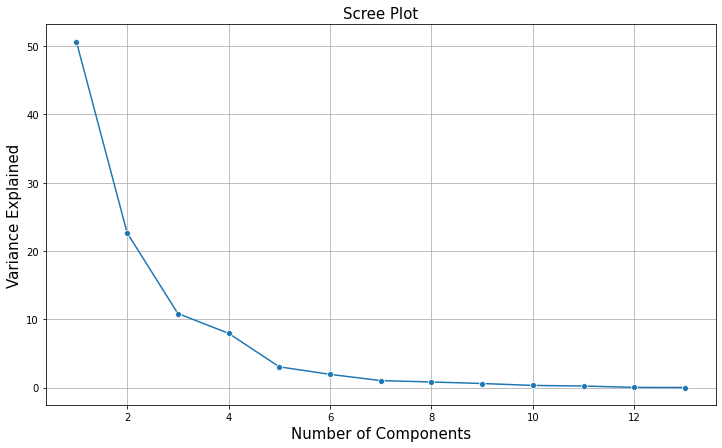

In [23]:
## step 4 :Scree Plot to decide on the Number of PCS

plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [24]:
## Step 5: Recasting the Data along with Principal Component Axes

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 16 to 5)
pca = PCA(n_components=5, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
trans_df_pca = df_pca.transpose() # Component output
trans_df_pca

array([[-1.36515097, -0.90705939, -1.08914092, ..., -0.3378136 ,
         0.2865988 ,  0.0275718 ],
       [ 0.56906691, -0.06402273,  0.1933552 , ...,  1.21631199,
         0.59268101,  0.86583827],
       [-0.43890361, -0.85490792, -0.79122229, ..., -0.20849757,
        -0.6969991 , -0.50885579],
       [ 2.26060236,  2.0459991 ,  1.85172962, ..., -0.45817143,
        -0.44295481, -0.44610196],
       [ 0.17854824,  0.13432007,  0.22787102, ..., -0.04827832,
        -0.01726643, -0.0537556 ]])

In [25]:
pca

PCA(n_components=5, random_state=123)

In [26]:
df_pca.shape

(9357, 5)

In [27]:
df_pca.transpose().shape

(5, 9357)

In [28]:
df_pca_loading = pd.DataFrame(pca.components_[:5, :])
df_pca_loading

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.004102,-0.363754,-0.038280,-0.380572,-0.337777,-0.037320,-0.143070,-0.016872,-0.337443,-0.298611,-0.361022,-0.346578,-0.362817
1,0.361869,0.141825,0.076563,-0.079817,0.196226,0.527856,-0.380496,0.482840,0.035878,0.275625,-0.154940,-0.136084,-0.147896
2,-0.528427,0.142422,-0.044157,-0.104669,0.260650,-0.112936,-0.501695,-0.365940,0.232305,0.282819,-0.140758,-0.176573,-0.190604
3,0.060886,0.054129,0.961507,-0.053103,0.007252,-0.173678,0.064124,-0.042487,0.121380,-0.025171,-0.061003,-0.079799,-0.066767
4,-0.705109,0.031213,0.179993,0.040484,-0.108227,0.425152,0.201629,0.261363,-0.353965,0.069036,-0.079774,0.161568,0.062075


In [29]:
df_pca_loading.shape

(5, 13)

In [30]:
# Let’s identify which features have Maximum loading across the components. We will 
# first plot the component loading on a heatmap.

# For each feature, we find the maximum loading 
# value across the components and mark the same 
# with the help of a rectangular box.

# Features marked with the rectangular red 
# boxes are the ones having maximum loading on
# the respective component. We consider these marked
# features to decide the context that the component represents.

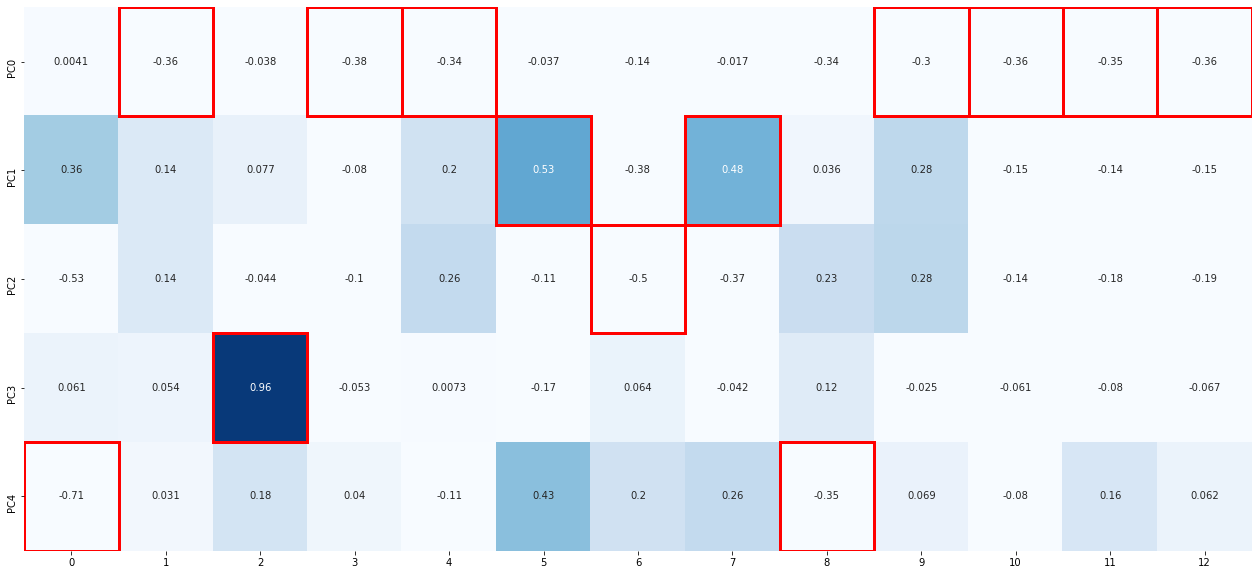

In [31]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4'])
column_max = df_pca_loading.abs().idxmax(axis=0)
for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [32]:
# Reconstruction of Data
pd.DataFrame(trans_df_pca)

,0,1,2,3,4,5,6,7,8,9,...,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356
0,-1.365151,-0.907059,-1.089141,-1.193349,-0.849168,-0.533377,-0.297871,-0.233960,-0.050620,0.217815,...,0.783813,0.188226,-1.438538,-1.902712,-1.018276,-1.120703,-0.473698,-0.337814,0.286599,0.027572
1,0.569067,-0.064023,0.193355,0.420985,-0.004827,-0.513572,-0.958991,-0.992100,-1.363183,-3.144873,...,-1.035543,0.083532,2.300260,2.707696,2.230160,2.195673,1.446946,1.216312,0.592681,0.865838
2,-0.438904,-0.854908,-0.791222,-0.683499,-1.037992,-1.400563,-1.730053,-1.756875,-2.055674,-1.557041,...,-1.511314,-0.710198,0.435259,0.858281,0.225277,0.303331,-0.153225,-0.208498,-0.696999,-0.508856
3,2.260602,2.045999,1.851730,1.744755,1.562042,1.506103,1.505545,1.491902,1.470374,1.694844,...,-0.296861,-0.404817,-0.613806,-0.570995,-0.618765,-0.579352,-0.504465,-0.458171,-0.442955,-0.446102
4,0.178548,0.134320,0.227871,0.284756,0.322021,0.347257,0.354592,0.360239,0.410592,-0.432192,...,0.068779,0.026872,0.240319,0.044241,0.331754,0.276745,0.103338,-0.048278,-0.017266,-0.053756


In [36]:
pd.DataFrame(trans_df_pca.transpose())

,0,1,2,3,4
0,-1.365151,0.569067,-0.438904,2.260602,0.178548
1,-0.907059,-0.064023,-0.854908,2.045999,0.134320
2,-1.089141,0.193355,-0.791222,1.851730,0.227871
3,-1.193349,0.420985,-0.683499,1.744755,0.284756
4,-0.849168,-0.004827,-1.037992,1.562042,0.322021
...,...,...,...,...,...
9352,-1.120703,2.195673,0.303331,-0.579352,0.276745
9353,-0.473698,1.446946,-0.153225,-0.504465,0.103338
9354,-0.337814,1.216312,-0.208498,-0.458171,-0.048278
9355,0.286599,0.592681,-0.696999,-0.442955,-0.017266
